In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


# EXPLORATORY DATA ANALYSIS

In [4]:
import pandas as pd
Data_Day = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/census_income.csv')
Data_Day.head()

Age          Workclass  Fnlwgt  ... Hours_per_week  Native_country  Income
0   50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
1   38            Private  215646  ...             40   United-States   <=50K
2   53            Private  234721  ...             40   United-States   <=50K
3   28            Private  338409  ...             40            Cuba   <=50K
4   37            Private  284582  ...             40   United-States   <=50K

[5 rows x 15 columns]

In [5]:
import pandas_profiling

In [6]:
report = pandas_profiling.ProfileReport(Data_Day)

In [7]:
report  ## Refer the various sections & Toggle the deatils for mode insight

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#Deleting duplicate rows
Data_Day = Data_Day.drop_duplicates()
Data_Day

Age          Workclass  Fnlwgt  ... Hours_per_week  Native_country  Income
0       50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
1       38            Private  215646  ...             40   United-States   <=50K
2       53            Private  234721  ...             40   United-States   <=50K
3       28            Private  338409  ...             40            Cuba   <=50K
4       37            Private  284582  ...             40   United-States   <=50K
...    ...                ...     ...  ...            ...             ...     ...
32555   27            Private  257302  ...             38   United-States   <=50K
32556   40            Private  154374  ...             40   United-States    >50K
32557   58            Private  151910  ...             40   United-States   <=50K
32558   22            Private  201490  ...             20   United-States   <=50K
32559   52       Self-emp-inc  287927  ...             40   United-States    >50K

[32536 rows x 15 columns]

In [9]:
Data_Day.info

<bound method DataFrame.info of        Age          Workclass  Fnlwgt  ... Hours_per_week  Native_country  Income
0       50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
1       38            Private  215646  ...             40   United-States   <=50K
2       53            Private  234721  ...             40   United-States   <=50K
3       28            Private  338409  ...             40            Cuba   <=50K
4       37            Private  284582  ...             40   United-States   <=50K
...    ...                ...     ...  ...            ...             ...     ...
32555   27            Private  257302  ...             38   United-States   <=50K
32556   40            Private  154374  ...             40   United-States    >50K
32557   58            Private  151910  ...             40   United-States   <=50K
32558   22            Private  201490  ...             20   United-States   <=50K
32559   52       Self-emp-inc  287927  ...             40   United

In [10]:
Data_Day.describe()

Age        Fnlwgt  ...  Capital_loss  Hours_per_week
count  32536.000000  3.253600e+04  ...  32536.000000    32536.000000
mean      38.585536  1.897843e+05  ...     87.370912       40.440343
std       13.638193  1.055563e+05  ...    403.107737       12.347079
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.178315e+05  ...      0.000000       40.000000
50%       37.000000  1.783560e+05  ...      0.000000       40.000000
75%       48.000000  2.369932e+05  ...      0.000000       45.000000
max       90.000000  1.484705e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]

In [11]:
#unique values present in each variable
Data_Day.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [12]:
#columns 
Data_Day.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# DATA PRE PROCESSING

In [13]:
!pip install klib

In [14]:
import klib

In [15]:
import klib
klib.missingval_plot(Data_Day)

No missing values found in the dataset.


In [16]:
# Check NA Values
Data_Day.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [17]:
Data_Day.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [18]:
#Defining numeric and categorical variables and saving in specific array
numeric_var = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
categorical_var = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country', 'Income']

In [19]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

Age


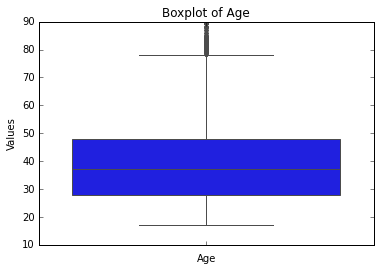

Fnlwgt


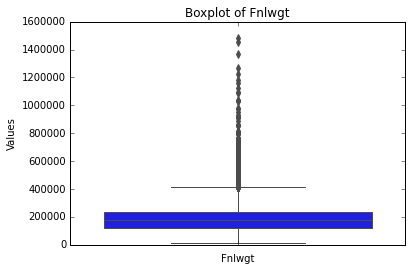

Education_num


Capital_gain


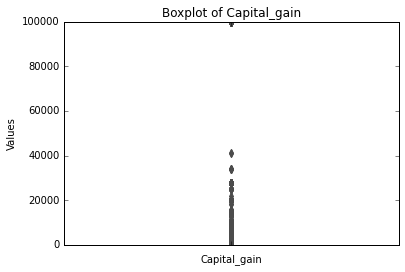

Capital_loss


Hours_per_week


In [20]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

In [21]:
# Encode Categorical Columns
categorical_var = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country', 'Income']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Data_Day[categorical_var] = Data_Day[categorical_var].apply(le.fit_transform)
Data_Day

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Age  Workclass  Fnlwgt  ...  Hours_per_week  Native_country  Income
0       50          6   83311  ...              13              39       0
1       38          4  215646  ...              40              39       0
2       53          4  234721  ...              40              39       0
3       28          4  338409  ...              40               5       0
4       37          4  284582  ...              40              39       0
...    ...        ...     ...  ...             ...             ...     ...
32555   27          4  257302  ...              38              39       0
32556   40          4  154374  ...              40              39       1
32557   58          4  151910  ...              40              39       0
32558   22          4  201490  ...              20              39       0
32559   52          5  287927  ...              40              39       1

[32536 rows x 15 columns]

In [22]:
#Outlier analysis

In [23]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))

# replace outliers with NA
    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

Age
Innerfence= -2.0
Upperfence= 78.0
IQR =20.0
Fnlwgt
Innerfence= -60911.125
Upperfence= 415735.875
IQR =119161.75
Education_num
Innerfence= 4.5
Upperfence= 16.5
IQR =3.0
Capital_gain
Innerfence= 0.0
Upperfence= 0.0
IQR =0.0
Capital_loss
Innerfence= 0.0
Upperfence= 0.0
IQR =0.0
Hours_per_week
Innerfence= 32.5
Upperfence= 52.5
IQR =5.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

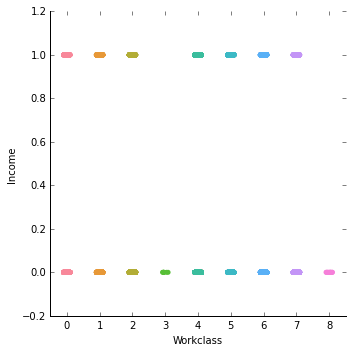

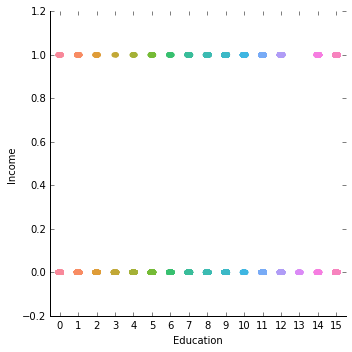

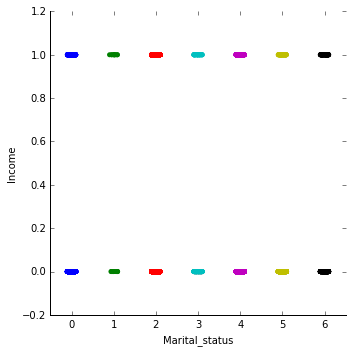

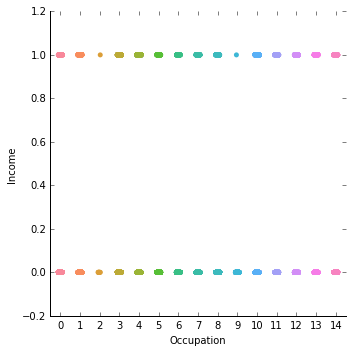

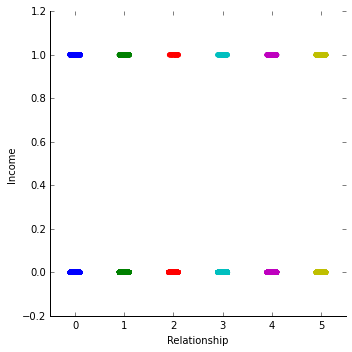

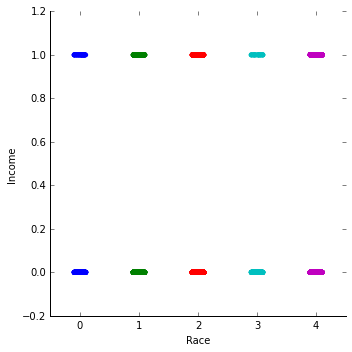

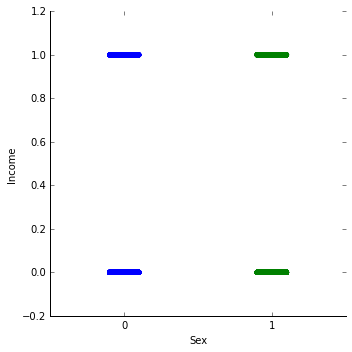

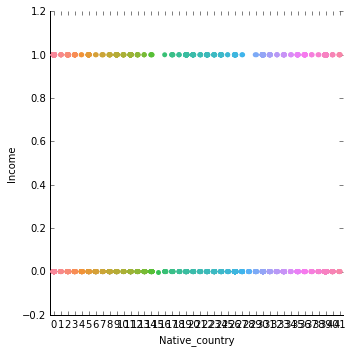

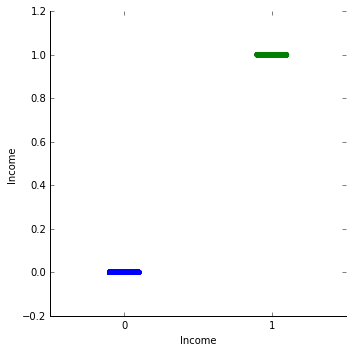

In [24]:
for i in categorical_var:
  sns.catplot(x = i, y = "Income", data=Data_Day, linewidths=.15)

                     Age  Workclass  ...  Native_country    Income
Age             1.000000   0.009958  ...       -0.001103  0.242738
Workclass       0.009958   1.000000  ...       -0.007697  0.051706
Fnlwgt         -0.063595  -0.016309  ...       -0.050170 -0.003614
Education      -0.007897   0.023480  ...        0.063874  0.079361
Education_num   0.112866   0.055184  ...       -0.040356  0.342585
Marital_status -0.282908  -0.064828  ...       -0.023414 -0.199187
Occupation     -0.016772   0.255105  ...       -0.012394  0.075398
Relationship   -0.267155  -0.090421  ...       -0.005634 -0.250955
Race            0.028469   0.049717  ...        0.137847  0.071855
Sex             0.090351   0.095960  ...       -0.008262  0.215984
Capital_gain         NaN        NaN  ...             NaN       NaN
Capital_loss         NaN        NaN  ...             NaN       NaN
Hours_per_week  0.050596   0.085520  ...        0.021983  0.195658
Native_country -0.001103  -0.007697  ...        1.000000  0.01

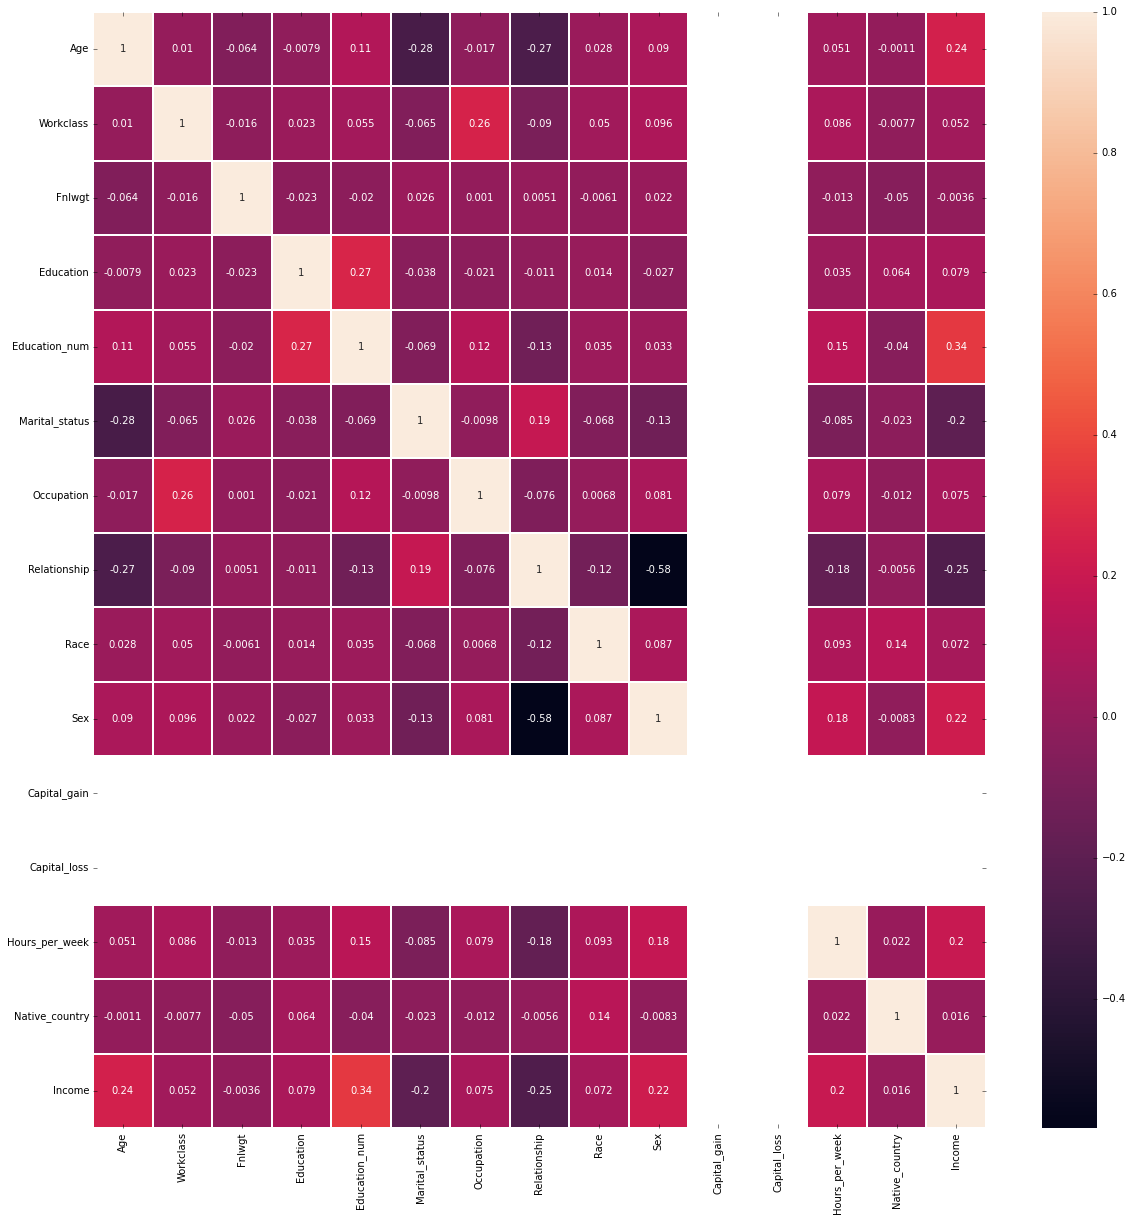

In [25]:
#Feature engineering
# Correlation Analysis and Anova test to find varaibles which can be excluded
var = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']
Data_Day_cor = Data_Day.loc[:, var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)
fig, ax = plt.subplots(figsize=(20,20)) ##To plot the heatmap into our required size
heatmap = sns.heatmap(correlation_result, annot=True, linewidths=1)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


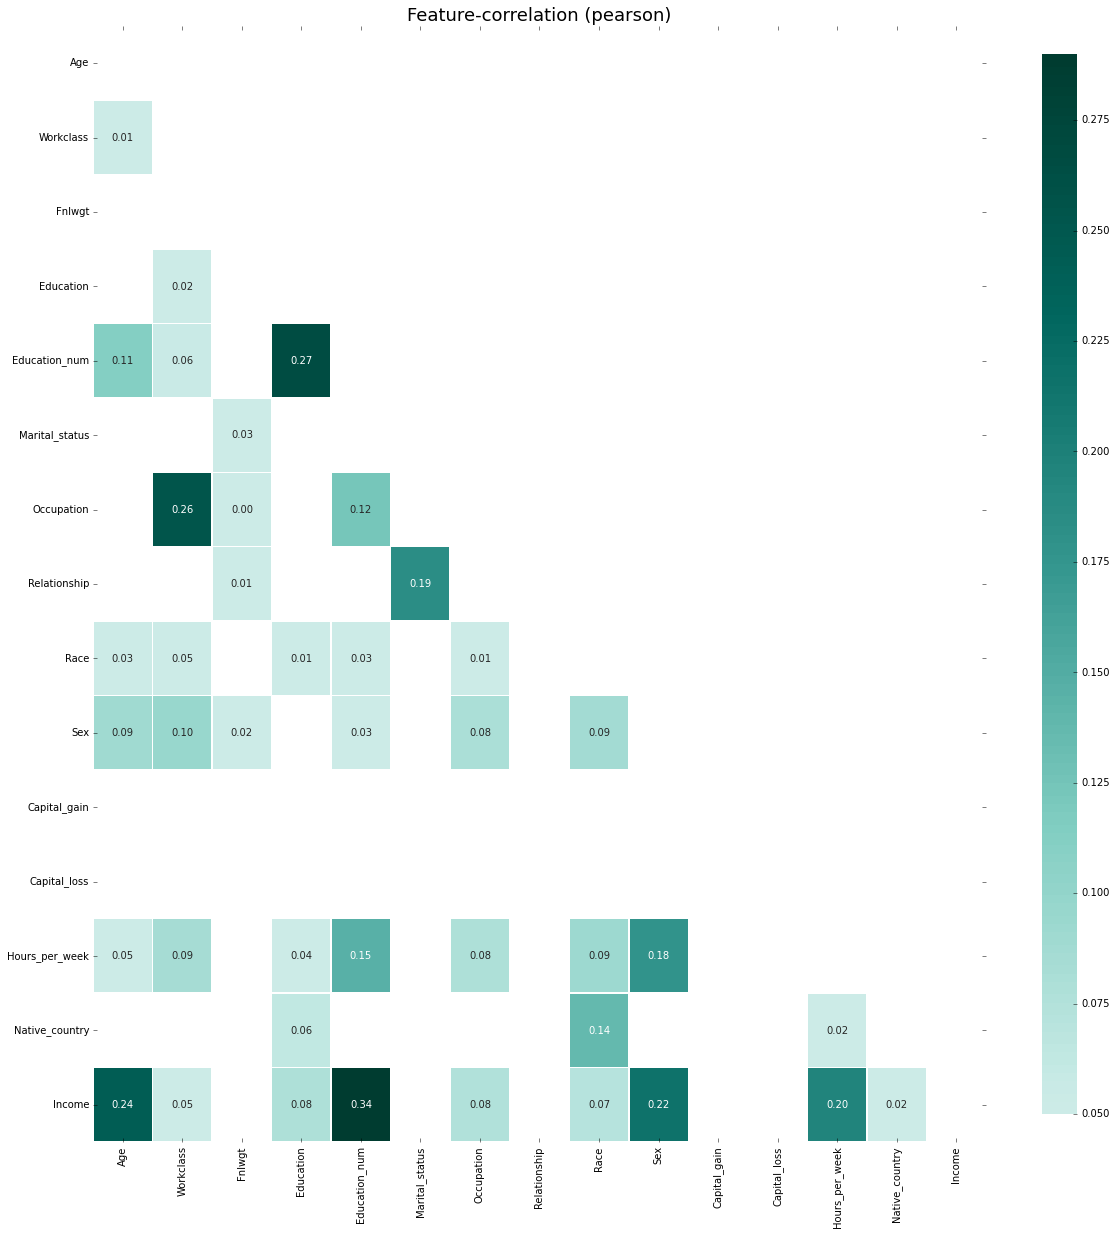

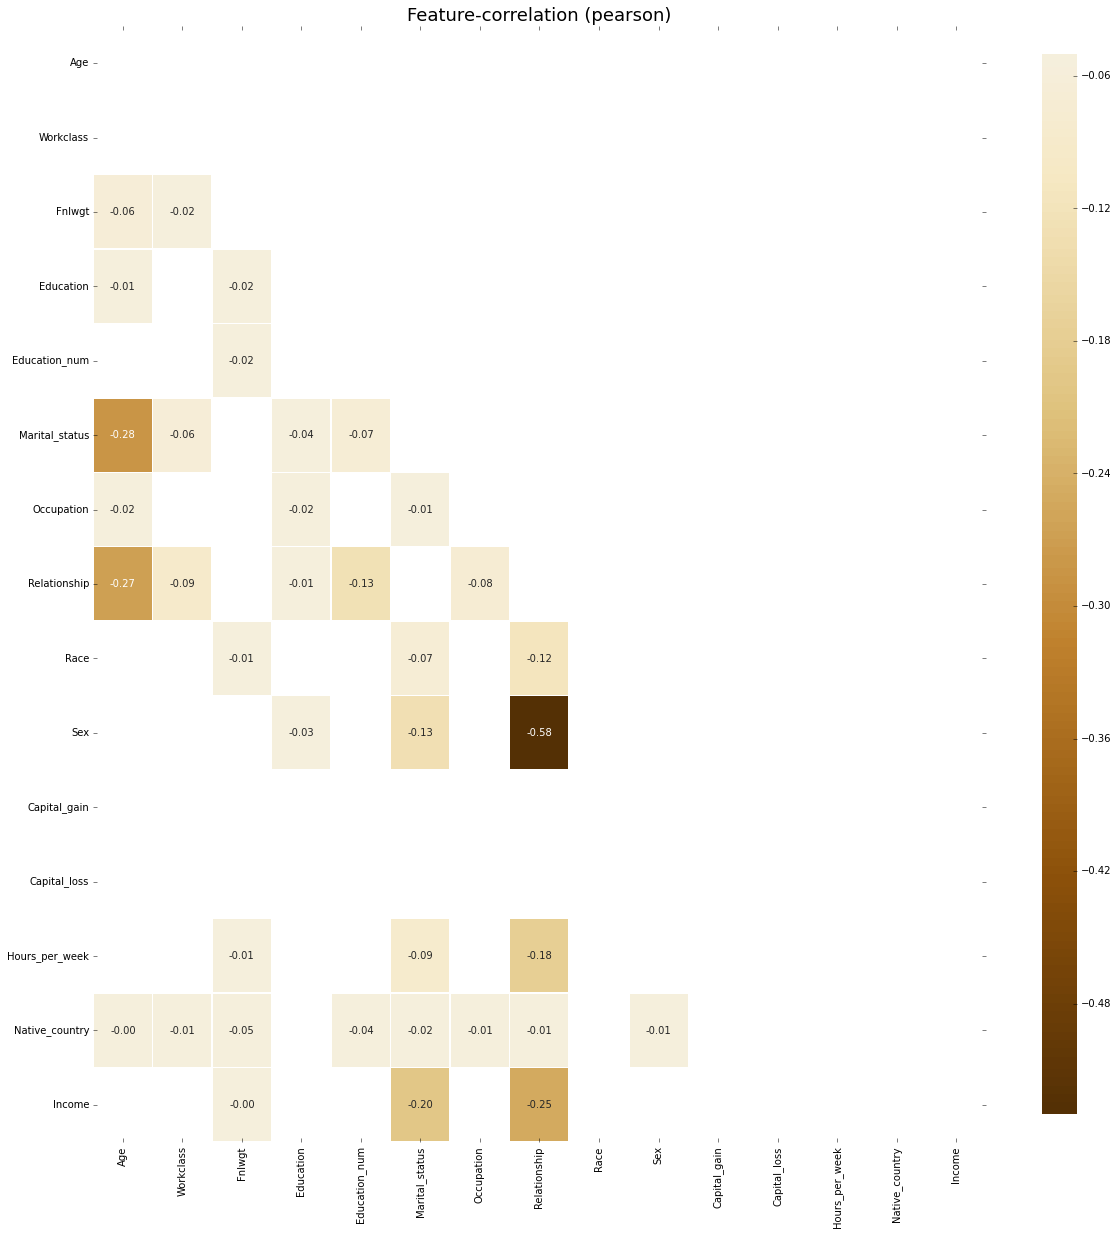

In [26]:
klib.corr_plot(Data_Day, split="pos", figsize=(20,20))
klib.corr_plot(Data_Day, split="neg", figsize=(20,20))

Having a look at we can say that Capital_gain & capital loos has no relationship with the data, also, sex, race, education & work_class, fnlwght, occupation has very poor relationship with rest of the variable, but the proble is all the variables can not be be removed as data will be be vary minimal for model deployment & therefore the  chances of model overfitting will arrived.

In [27]:
Data_Day.describe()

Age     Workclass  ...  Native_country        Income
count  32394.000000  32536.000000  ...    32536.000000  32536.000000
mean      38.386954      3.868638  ...       36.721508      0.240933
std       13.330273      1.456363  ...        7.820842      0.427656
min       17.000000      0.000000  ...        0.000000      0.000000
25%       28.000000      4.000000  ...       39.000000      0.000000
50%       37.000000      4.000000  ...       39.000000      0.000000
75%       47.000000      4.000000  ...       39.000000      0.000000
max       78.000000      8.000000  ...       41.000000      1.000000

[8 rows x 15 columns]

In [28]:
Data_Day.drop(['Capital_gain',	'Capital_loss' ], axis='columns', inplace = True)
Data_Day

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Age  Workclass    Fnlwgt  ...  Hours_per_week  Native_country  Income
0      50.0          6   83311.0  ...             NaN              39       0
1      38.0          4  215646.0  ...            40.0              39       0
2      53.0          4  234721.0  ...            40.0              39       0
3      28.0          4  338409.0  ...            40.0               5       0
4      37.0          4  284582.0  ...            40.0              39       0
...     ...        ...       ...  ...             ...             ...     ...
32555  27.0          4  257302.0  ...            38.0              39       0
32556  40.0          4  154374.0  ...            40.0              39       1
32557  58.0          4  151910.0  ...            40.0              39       0
32558  22.0          4  201490.0  ...             NaN              39       0
32559  52.0          5  287927.0  ...            40.0              39       1

[32536 rows x 13 columns]

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


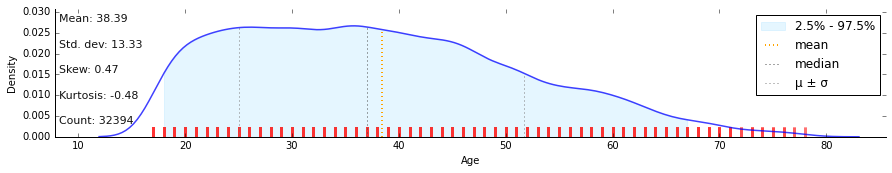

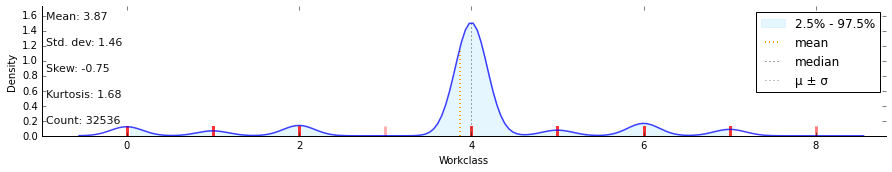

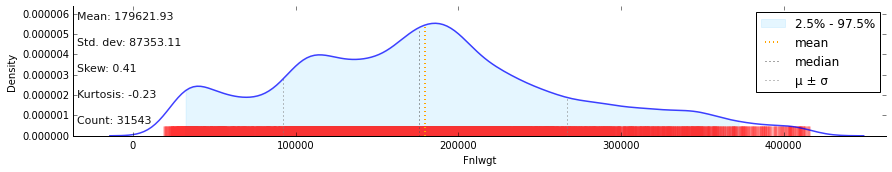

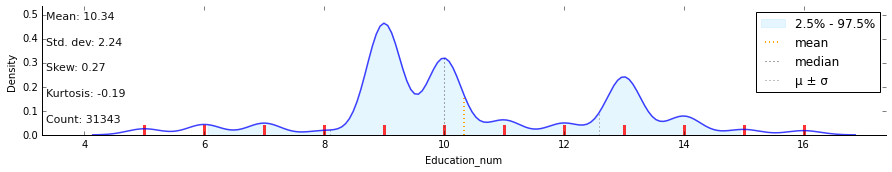

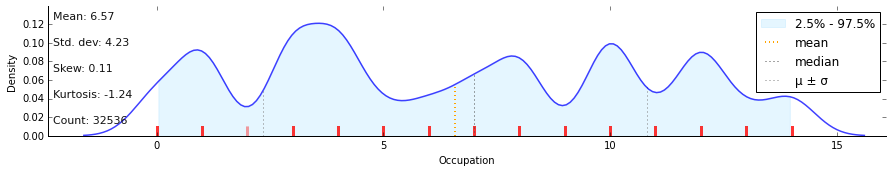

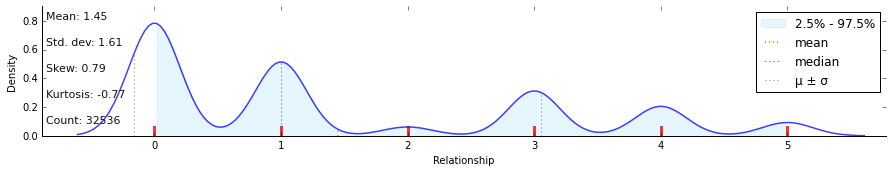

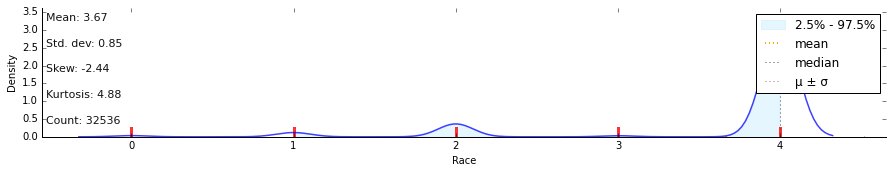

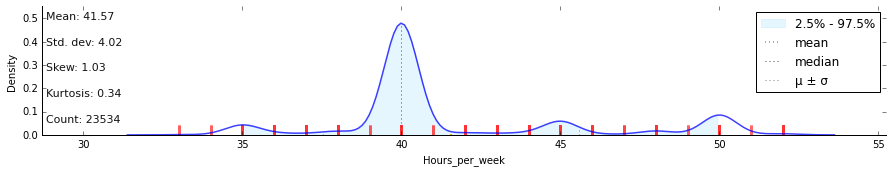

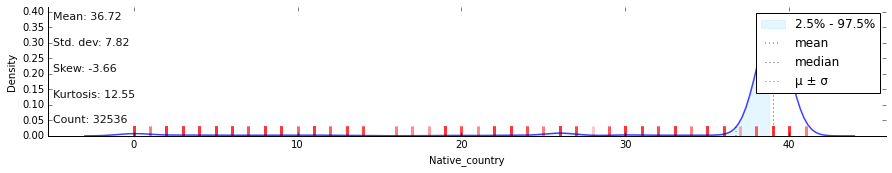

In [29]:
#Feature scalling
klib.dist_plot(Data_Day)

***Here we can eaisly infer that almost every variable is distributed  allmost normely in bell curve, except some nitty gritty deviation in some variable.

In [30]:
!pip install pycaret[Full]==2.3. 4

In [31]:
from pycaret.classification import *
exp1 = setup(Data_Day, target = 'Income')

Description             Value
0                               session_id              1046
1                                   Target            Income
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data       (32536, 13)
5                           Missing Values              True
6                         Numeric Features                 3
7                     Categorical Features                 9
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (22775, 83)
12                    Transformed Test Set        (9761, 83)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              5f10
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52                Feature Selection Method           classic
53            Features Selection Threshold              None
54                     Feature Interaction             False
55                           Feature Ratio             False
56                   Interaction Threshold              None
57                           Fix Imbalance             False
58                    Fix Imbalance Method             SMOTE

In [32]:
best_model = compare_models()   ##10 folds fitted & compared models.

Model  Accuracy     AUC  Recall   Prec.  \
catboost              CatBoost Classifier    0.8406  0.8917  0.5891  0.7034   
lightgbm  Light Gradient Boosting Machine    0.8400  0.8909  0.5926  0.6998   
xgboost         Extreme Gradient Boosting    0.8382  0.8855  0.5907  0.6940   
gbc          Gradient Boosting Classifier    0.8381  0.8897  0.5470  0.7165   
ada                  Ada Boost Classifier    0.8368  0.8885  0.5731  0.6982   
lda          Linear Discriminant Analysis    0.8324  0.8802  0.5582  0.6895   
ridge                    Ridge Classifier    0.8322  0.0000  0.5032  0.7183   
rf               Random Forest Classifier    0.8263  0.8712  0.5597  0.6681   
et                 Extra Trees Classifier    0.8123  0.8482  0.5595  0.6246   
dt               Decision Tree Classifier    0.7773  0.6988  0.5466  0.5390   
lr                    Logistic Regression    0.7583  0.5068  0.0000  0.0000   
nb                            Naive Bayes    0.7583  0.7537  0.0000  0.0000   
svm                   SVM - Linear Kernel    0.7579  0.0000  0.0009  0.0536   
knn                K Neighbors Classifier    0.7186  0.5697  0.1847  0.3460   
qda       Quadratic Discriminant Analysis    0.6034  0.5778  0.5283  0.3107   

              F1   Kappa     MCC  TT (Sec)  
catboost  0.6409  0.5395  0.5432     9.605  
lightgbm  0.6415  0.5395  0.5427     0.360  
xgboost   0.6379  0.5346  0.5377    12.876  
gbc       0.6201  0.5196  0.5274     3.599  
ada       0.6292  0.5259  0.5303     1.030  
lda       0.6167  0.5110  0.5159     0.396  
ridge     0.5915  0.4900  0.5025     0.062  
rf        0.6089  0.4984  0.5018     3.268  
et        0.5902  0.4689  0.4702     3.375  
dt        0.5427  0.3956  0.3956     0.236  
lr        0.0000  0.0000  0.0000     0.268  
nb        0.0000  0.0000  0.0000     0.063  
svm       0.0018  0.0001  0.0007     1.342  
knn       0.2407  0.0873  0.0938     0.473  
qda       0.3874  0.1239  0.1368     0.217

In [33]:
# check the best model
print(best_model)

In [34]:
# predict on hold-out
pred_holdout = predict_model(best_model)  

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa   MCC
0  CatBoost Classifier     0.838  0.8883   0.572  0.6964  0.6281  0.5258  0.53

In [35]:
catboost = create_model('catboost')   ##10 folds fitted & compared models.

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8450  0.8961  0.6316  0.6988  0.6635  0.5632  0.5644
1       0.8319  0.8829  0.5445  0.6944  0.6104  0.5052  0.5113
2       0.8455  0.8918  0.6171  0.7069  0.6589  0.5596  0.5618
3       0.8363  0.8911  0.5808  0.6926  0.6318  0.5276  0.5309
4       0.8402  0.8892  0.5735  0.7101  0.6345  0.5338  0.5388
5       0.8437  0.8952  0.5836  0.7165  0.6433  0.5445  0.5492
6       0.8450  0.8932  0.6109  0.7074  0.6556  0.5563  0.5588
7       0.8362  0.8961  0.5636  0.6998  0.6244  0.5212  0.5262
8       0.8415  0.8917  0.6055  0.6981  0.6485  0.5468  0.5491
9       0.8410  0.8899  0.5800  0.7089  0.6380  0.5374  0.5419
Mean    0.8406  0.8917  0.5891  0.7034  0.6409  0.5395  0.5432
SD      0.0043  0.0038  0.0253  0.0073  0.0157  0.0174  0.0161

In [36]:
tuned_model = tune_model(catboost)   ##10 folds fitted & compared models.

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8380  0.8929  0.6189  0.6820  0.6489  0.5439  0.5450
1       0.8367  0.8816  0.5608  0.7039  0.6242  0.5216  0.5271
2       0.8424  0.8888  0.5971  0.7060  0.6470  0.5465  0.5496
3       0.8393  0.8870  0.5789  0.7042  0.6355  0.5337  0.5379
4       0.8402  0.8895  0.5644  0.7149  0.6308  0.5307  0.5367
5       0.8507  0.8965  0.6273  0.7188  0.6699  0.5740  0.5762
6       0.8450  0.8895  0.6200  0.7031  0.6589  0.5591  0.5610
7       0.8375  0.8927  0.5800  0.6965  0.6329  0.5297  0.5334
8       0.8428  0.8889  0.6109  0.7000  0.6524  0.5514  0.5536
9       0.8274  0.8886  0.5618  0.6703  0.6113  0.5015  0.5047
Mean    0.8400  0.8896  0.5920  0.7000  0.6412  0.5392  0.5425
SD      0.0058  0.0038  0.0247  0.0137  0.0166  0.0194  0.0186

In [37]:
catboost_bagged = ensemble_model(catboost)   ##This is a begging based enselmbled model by default. For boositing we would need to use boosting as paramenter.

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8472  0.8974  0.6316  0.7059  0.6667  0.5680  0.5695
1       0.8358  0.8852  0.5481  0.7073  0.6176  0.5152  0.5220
2       0.8424  0.8931  0.5971  0.7060  0.6470  0.5465  0.5496
3       0.8450  0.8920  0.5953  0.7162  0.6501  0.5517  0.5556
4       0.8420  0.8902  0.5717  0.7175  0.6364  0.5371  0.5427
5       0.8467  0.8958  0.5927  0.7228  0.6513  0.5543  0.5588
6       0.8485  0.8948  0.6091  0.7204  0.6601  0.5635  0.5668
7       0.8397  0.8974  0.5691  0.7098  0.6317  0.5308  0.5361
8       0.8410  0.8919  0.6091  0.6950  0.6492  0.5470  0.5490
9       0.8366  0.8900  0.5655  0.7005  0.6258  0.5228  0.5277
Mean    0.8425  0.8928  0.5889  0.7101  0.6436  0.5437  0.5478
SD      0.0041  0.0036  0.0238  0.0085  0.0146  0.0162  0.0150

***Ensembling is not coming usp with better results therefore we may consider tuned_model for further analysis.***

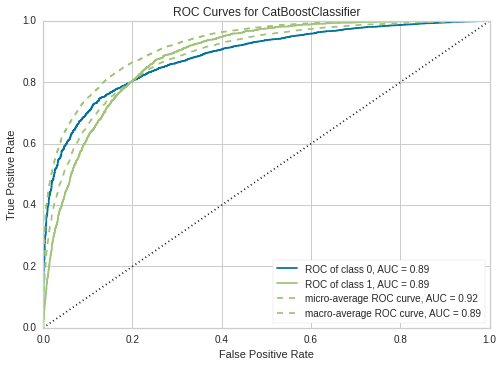

In [38]:
# AUC plot
plot_model(tuned_model, plot = 'auc')

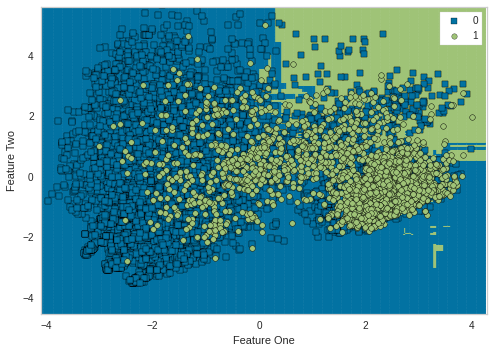

In [39]:
# Decision Boundary
plot_model(tuned_model, plot = 'boundary')

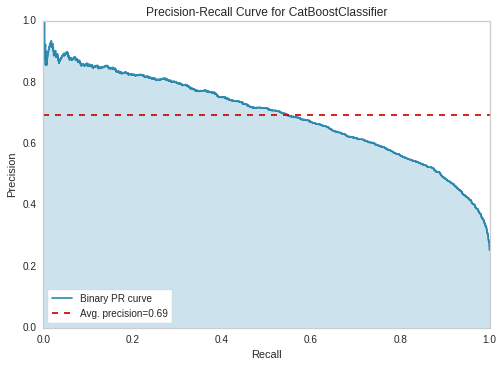

In [40]:
# Precision Recall Curve
plot_model(tuned_model, plot = 'pr')

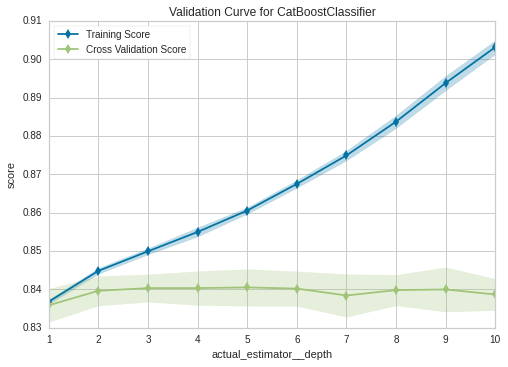

In [41]:
# Validation Curve
plot_model(tuned_model, plot = 'vc')

In [42]:
evaluate_model(tuned_model) ###Clicking atr various icons wilkl producs respective graphs

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [43]:
evaluate_model(tuned_model) ###Clicking atr various icons wilkl produces respective graphs on a live kernel

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

***TypeError:*** This function only supports tree based models for binary classification: xgboost, catboost, rf, et, lightgbm, dt.

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8450  0.8961  0.6316  0.6988  0.6635  0.5632  0.5644
1       0.8319  0.8829  0.5445  0.6944  0.6104  0.5052  0.5113
2       0.8455  0.8918  0.6171  0.7069  0.6589  0.5596  0.5618
3       0.8363  0.8911  0.5808  0.6926  0.6318  0.5276  0.5309
4       0.8402  0.8892  0.5735  0.7101  0.6345  0.5338  0.5388
5       0.8437  0.8952  0.5836  0.7165  0.6433  0.5445  0.5492
6       0.8450  0.8932  0.6109  0.7074  0.6556  0.5563  0.5588
7       0.8362  0.8961  0.5636  0.6998  0.6244  0.5212  0.5262
8       0.8415  0.8917  0.6055  0.6981  0.6485  0.5468  0.5491
9       0.8410  0.8899  0.5800  0.7089  0.6380  0.5374  0.5419
Mean    0.8406  0.8917  0.5891  0.7034  0.6409  0.5395  0.5432
SD      0.0043  0.0038  0.0253  0.0073  0.0157  0.0174  0.0161

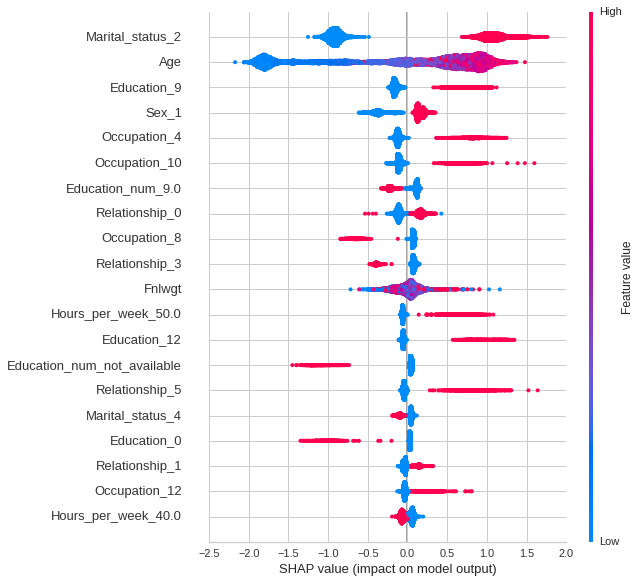

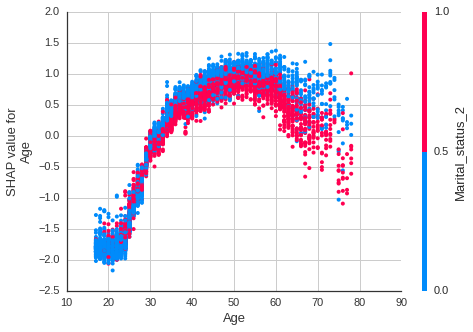

In [44]:
# create a model
catboost = create_model('catboost')
# summary plot
interpret_model(catboost)
# correlation plot
interpret_model(catboost, plot = 'correlation')

In [45]:
# predict test / hold-out dataset
catboost_holdout_pred = predict_model(catboost)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa   MCC
0  CatBoost Classifier     0.838  0.8883   0.572  0.6964  0.6281  0.5258  0.53

In [46]:
predictions = predict_model(catboost, data = Data_Day)
predictions

Age  Workclass    Fnlwgt  ...  Income  Label   Score
0      50.0          6   83311.0  ...       0      1  0.5731
1      38.0          4  215646.0  ...       0      0  0.9761
2      53.0          4  234721.0  ...       0      0  0.8815
3      28.0          4  338409.0  ...       0      0  0.7175
4      37.0          4  284582.0  ...       0      1  0.8490
...     ...        ...       ...  ...     ...    ...     ...
32555  27.0          4  257302.0  ...       0      0  0.6306
32556  40.0          4  154374.0  ...       1      0  0.6668
32557  58.0          4  151910.0  ...       0      0  0.9605
32558  22.0          4  201490.0  ...       0      0  0.9981
32559  52.0          5  287927.0  ...       1      1  0.7798

[32536 rows x 15 columns]

In [47]:
evaluate_model(tuned_model)   ###Clicking atr various icons wilkl produces respective graphs on a live kernel

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…